In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
DG = nx.Graph()
DG.add_edges_from([(1,2), (1,5), (2,3),(2,5),(3,4),(4,5), (4, 6)])

c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


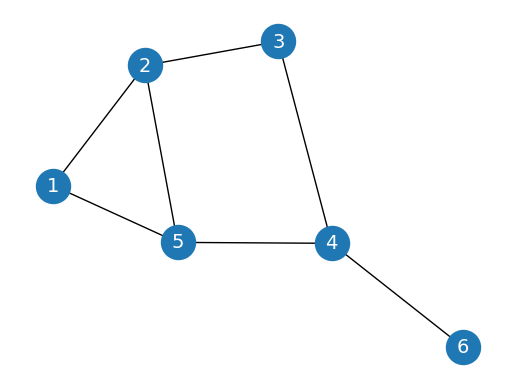

In [12]:
plt.axis('off')
nx.draw_networkx(DG, pos=nx.spring_layout(DG, seed=0),node_size=600,cmap='coolwarm',font_size='14',font_color='white')

In [23]:
part = nx.community.edge_betweenness_partition(DG, number_of_sets=2)
part

[{1, 2, 5}, {3, 4, 6}]

In [26]:
print(f'Edge betweenness: {nx.edge_betweenness_centrality(DG, None, False, None, False)}')

Edge betweenness: {(1, 2): 2.0, (1, 5): 3.0, (2, 3): 3.5, (2, 5): 2.5, (5, 4): 5.5, (3, 4): 3.5, (4, 6): 5.0}


In [27]:
g2 = nx.karate_club_graph()

c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


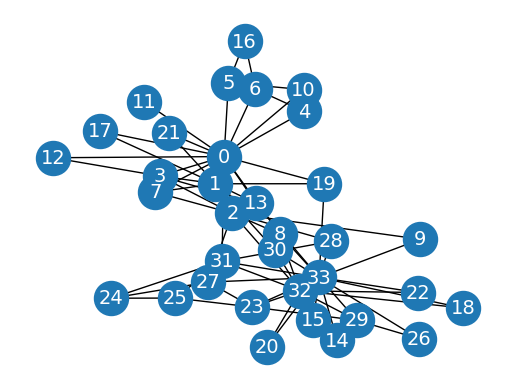

In [29]:
plt.axis('off')
nx.draw_networkx(g2, pos=nx.spring_layout(g2, seed=0),node_size=600,cmap='coolwarm',font_size='14',font_color='white')

In [32]:
# Breadth first search
def bfs(graph, node):
    visited, queue = [node], [node]
    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

# Depth first search
visited = []
def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)
    return visited

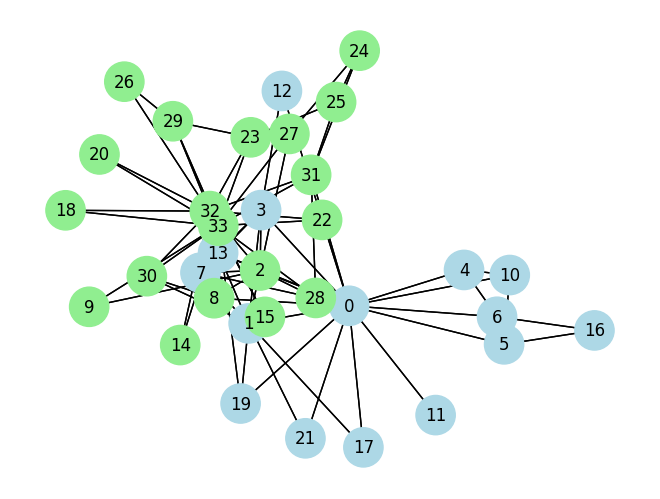

In [31]:
communities = nx.community.edge_betweenness_partition(g2, number_of_sets=2)
partition = [set(c) for c in communities]

color_map = []
for node in g2:
    if node in partition[0]:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

pos = nx.spring_layout(g2)
nx.draw(g2, pos, node_color=color_map, with_labels=True, node_size=800, font_size=12, font_color='black')

nx.draw_networkx_edges(g2, pos)
plt.show()

In [33]:
bfs(DG, 1)

[1, 2, 5, 3, 4, 6]

In [34]:
visited = []
dfs(visited, DG, 3)

[3, 2, 1, 5, 4, 6]